### This file is used for model training
- data prep was done beforehand
- ./Projekt_Bewerbung/buildDiffer/BuildDiffer/training_data.csv contains a csv with build metrics used for training and testing the model 
- The labels can be extracted from the ./Projekt_Bewerbung/data/travistorrent_100commits_withoutduplicates.csv 
as the order is still the same for both files 

- - pass 
- - fail
- - errored
- - canceled

### Read in data

In [40]:
import pandas as pd
import numpy as np
#!pip3 install matplotlib
import matplotlib.pyplot as plt
#!pip3 install imblearn
from imblearn.over_sampling import SMOTE
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
data = pd.read_csv('/Users/Rina/Desktop/StudiAssistent/Projekt_Bewerbung/buildDiffer/BuildDiffer/training_data.csv')

#print(data.head())
#    DependencyChange  TeamChange  RepositoryChange  GeneralChange  BuildChange   BuildResult         
#0                 0           0                 5              0            1    errored

labels = pd.DataFrame(data['BuildResult'])
print(labels.head())

data = data.drop(['BuildResult'], axis=1)
print(data.head())

# dummy data 
#import numpy as np
#data = pd.DataFrame(np.random.randint(0,10, size=(100,1)))

  BuildResult
0      passed
1    canceled
2    canceled
3      passed
4    canceled
   DependencyChange  TeamChange  RepositoryChange  GeneralChange  BuildChange
0                 0           0                 0              1            0
1                 0           0                 0              0            0
2                 0           0                 0              0            0
3                 0           0                 0              1            0
4                 0           0                 0              0            0


### Oversampling

In [42]:
# TODO introduced bc first version of data consisted of almost only errored buildresults; new dataset containts 25 samples of all 4 classes 

smote = SMOTE()
print('Data', data.shape)
print('Labels', labels.shape)

X_oversampled, y_oversampled = smote.fit_resample(data,labels)
print(X_oversampled.shape)
print(y_oversampled.shape)


Data (89, 5)
Labels (89, 1)
(100, 5)
(100, 1)


### Dataset splitting

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2)

print('Training data', X_train)
print('Training labels', y_train)

Training data     DependencyChange  TeamChange  RepositoryChange  GeneralChange  BuildChange
46                 0           0                 0              0            0
54                 0           0                 0              0            0
85                 0           0                 0              1            0
44                 0           0                 0              1            0
32                 0           0                 0              0            0
..               ...         ...               ...            ...          ...
74                 0           0                 0              0            0
71                 0           0                 0              1            0
75                 0           0                 0              1            0
12                 0           0                 0              1            0
47                 0           0                 0              0            1

[71 rows x 5 columns]
Training labels

### Model training

In [44]:
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

test_preditctions = classifier.predict(X_test)

print('Actual values', y_test)
print('Predicted values', test_preditctions)

# true values , predicted values 
accuracy = accuracy_score(y_test, test_preditctions)
print('\nAccuracy of predictions: ', accuracy)

Actual values 

/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


   BuildResult
1     canceled
66     errored
20      failed
82      passed
30    canceled
33     errored
22      passed
53    canceled
48      passed
37      passed
52     errored
28    canceled
18    canceled
27      failed
21      passed
6     canceled
55      failed
34      failed
Predicted values ['failed' 'errored' 'failed' 'errored' 'failed' 'errored' 'failed'
 'canceled' 'errored' 'errored' 'errored' 'failed' 'failed' 'errored'
 'errored' 'failed' 'failed' 'failed']

Accuracy of predictions:  0.3888888888888889


### Plots


18
18
18


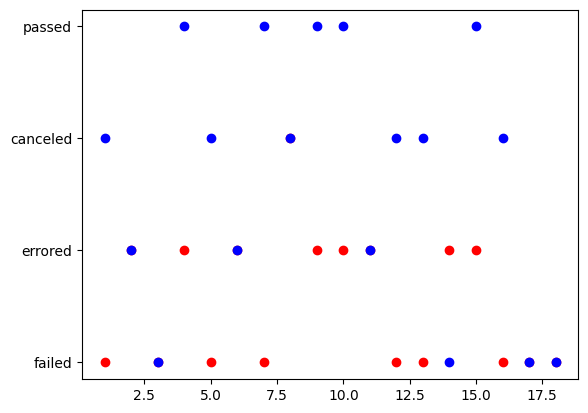

In [45]:
size_test_set = X_test.shape[0] # row = [0], col = [1]
print(size_test_set)

# plot actual test point and prediction
plt.scatter(np.arange(1, 19), test_preditctions, color="red") 
plt.scatter(np.arange(1, 19), y_test['BuildResult'], color="blue") 